In [1]:
import os
import sys
import random
import math
import numpy as np
import cv2
import json
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from matplotlib import pylab

%matplotlib inline

In [2]:
def gen_colors(NUM_COLORS):
    cm = pylab.get_cmap('gist_rainbow')
    return [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

In [3]:
def process_annotation_file(annotation_file_path, image_id, images_dir):
    with open(annotation_file_path, 'r') as json_file:
        subset_annotation = dict()
        annotations = json.load(json_file)
        id = image_id
        if id == -1:
            rand_idx = random.randint(0, len(annotations["images"]))
            id = annotations["images"][rand_idx]["id"]
        subset_annotation["info"] = annotations["info"]
        subset_annotation["categories"] = annotations["categories"]
        subset_annotation["images"] = [image for image in annotations["images"] if image["id"] == id]
        image_file_path = os.path.join(images_dir, subset_annotation["images"][0]["file_name"])
        subset_annotation["annotations"] = [annotation for annotation in annotations["annotations"] if annotation["image_id"] == id]
        print(subset_annotation["annotations"])
        return(subset_annotation, image_file_path)

In [4]:
def display_image(subset_annotation, image_file_path, COLORS):
    image = mpimg.imread(image_file_path)
    fig, ax = plt.subplots(figsize=(20,30))
    ax.imshow(image)
    for annotation in subset_annotation["annotations"]:
        bbox = annotation["bbox"] # list x1,y1,x2,y2
        print(bbox)
        segm = annotation["segmentation"] # 2d list [[x1,y1,x2,y2]]
        catg = annotation["category_id"]
        color = COLORS[catg]
        rect = patches.Rectangle((bbox[0],bbox[1]),bbox[2],bbox[3],linewidth=1,edgecolor=color,facecolor='none')
        ax.add_patch(rect)

In [7]:
ROOT_DIR=os.path.abspath('/home/eli/Downloads/steele')
IMAGES_DIR=os.path.join(ROOT_DIR, 'images')
ANNOTATION_DIR=os.path.join(ROOT_DIR, 'annotations')
IMG_ID = 2
SUBSET = 'val'
YEAR = '2018'
SUBSET_ANNOTATION_FILE = os.path.join(ANNOTATION_DIR, "annotations_%s_%s.json"%(SUBSET, YEAR))
# SUBSET_ANNOTATION_FILE = os.path.join(ANNOTATION_DIR, "annotations.json")

[{'id': 194, 'image_id': 10, 'bbox': [743.65, 411.24, 21.24, 27.08], 'segmentation': [[411.24, 743.65, 438.32, 743.65, 438.32, 764.89, 411.24, 764.89]], 'area': 575.1791, 'category_id': 5, 'iscrowd': 0}, {'id': 199, 'image_id': 10, 'bbox': [477.07, 836.48, 95.63, 55.47], 'segmentation': [[836.48, 477.07, 891.95, 477.07, 891.95, 572.7, 836.48, 572.7]], 'area': 5304.5961, 'category_id': 1, 'iscrowd': 0}]
[743.65, 411.24, 21.24, 27.08]
[477.07, 836.48, 95.63, 55.47]
/home/eli/Downloads/steele/images/steele-0-00-00009.jpg


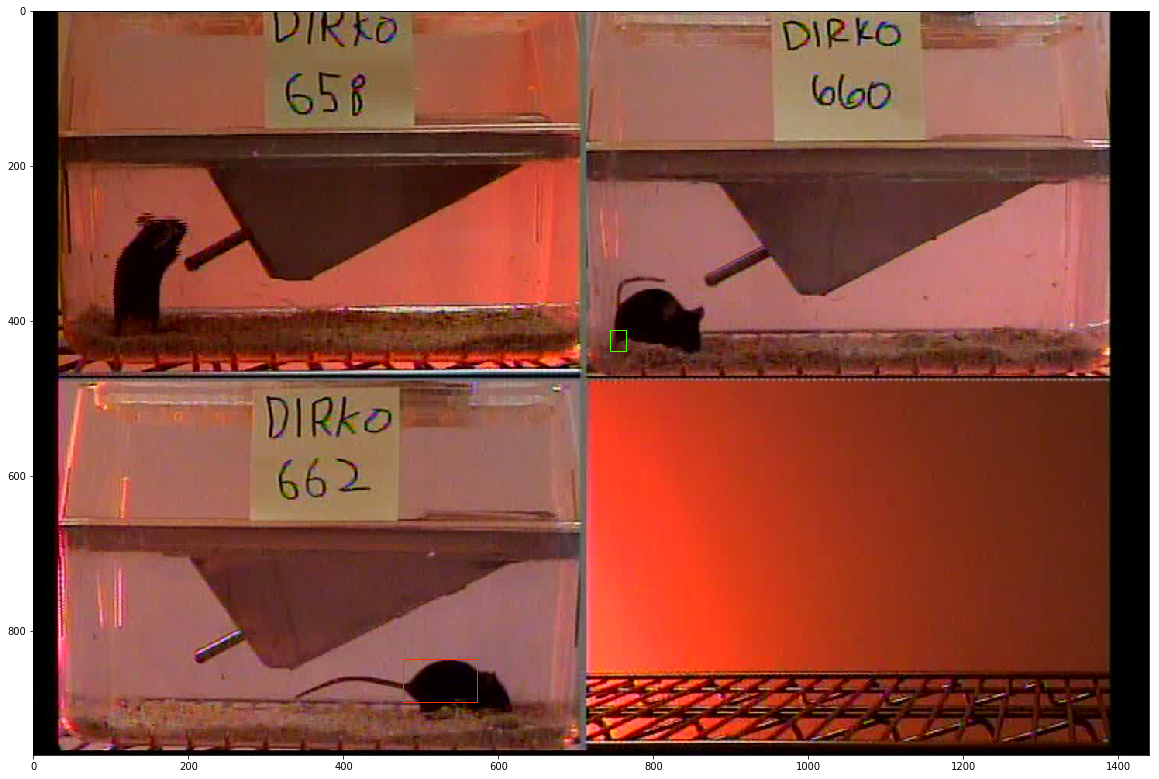

In [8]:
(subset_annotation, image_file_path) = process_annotation_file(SUBSET_ANNOTATION_FILE, -1, IMAGES_DIR)
COLORS = gen_colors(len(subset_annotation["categories"])+1)
display_image(subset_annotation, image_file_path, COLORS)
print(image_file_path)